In [83]:
import pandas as pd
from scipy.stats import spearmanr, ttest_ind, ranksums, mannwhitneyu
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('athleat_diet.txt', sep=' ')

In [5]:
df.head()

,group,fat,ca
0,2,10.5,4.0
1,2,12.6,6.0
2,2,15.0,6.0
3,2,17.0,8.0
4,2,18.0,10.6


In [6]:
df.shape

(45, 3)

group
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fat, dtype: object

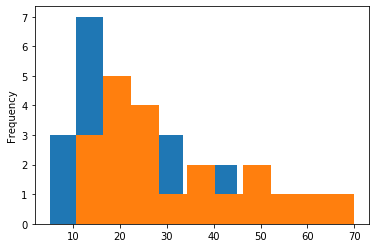

In [14]:
df.groupby('group')['fat'].plot.hist('fat', bins=10)

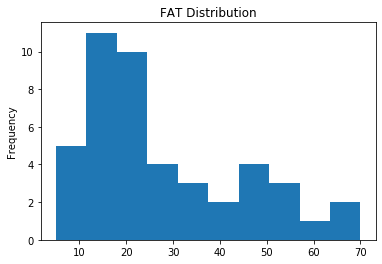

In [18]:
df['fat'].plot.hist(title='FAT Distribution')

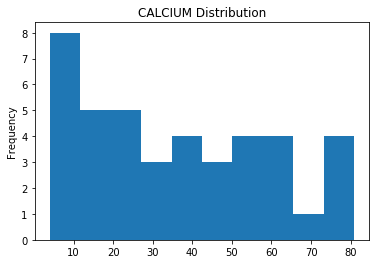

In [19]:
df['ca'].plot.hist(title='CALCIUM Distribution')

In [26]:
# spearman rank correlation between fat and ca
spearmanr(list(df['fat']), list(df['ca']))

SpearmanrResult(correlation=nan, pvalue=nan)

In [27]:
spearmanr([1,2,3,4,5],[5,6,7,8,7])

SpearmanrResult(correlation=0.8207826816681233, pvalue=0.08858700531354381)

In [31]:
df[['fat','ca']].corr('spearman')

,fat,ca
fat,1.000000,0.634174
ca,0.634174,1.000000


In [35]:
spearmanr(df.dropna()['fat'], df.dropna()['ca'])

SpearmanrResult(correlation=0.6341739628821382, pvalue=8.511582562659095e-06)

In [40]:
# one-sided t-test
ttest_ind(
    df[df['group'] == 1]['fat'], 
    df[df['group'] == 2]['fat']
)

Ttest_indResult(statistic=-1.639983307844428, pvalue=0.10830506412976239)

In [43]:
# one-sided t-test
ttest_ind(
    df.dropna()[df['group'] == 1]['ca'], 
    df.dropna()[df['group'] == 2]['ca']
)

/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Ttest_indResult(statistic=2.135458222047128, pvalue=0.03905971681950763)

In [44]:
df_na = df.dropna()
ttest_ind(
    df_na[df['group'] == 1]['ca'], 
    df_na[df['group'] == 2]['ca']
)

/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Ttest_indResult(statistic=2.135458222047128, pvalue=0.03905971681950763)

In [54]:
df_na['group'].value_counts()

2    21
1    20
Name: group, dtype: int64

In [55]:
df['group'].value_counts()

1    24
2    21
Name: group, dtype: int64

In [56]:
df.describe()

,group,fat,ca
count,45.000000,45.000000,41.000000
mean,1.466667,27.691111,36.653659
std,0.504525,16.726080,23.685250
min,1.000000,5.000000,4.000000
25%,1.000000,15.000000,15.800000
50%,1.000000,22.000000,32.000000
75%,2.000000,39.000000,55.100000
max,2.000000,70.000000,80.900000


In [57]:
df['fat'].median()

22.0

In [62]:
df['ca'].median()

32.0

In [64]:
# Wilcoxon rank-sum test (non-parametric t-test)
# one-sided t-test
ranksums(
    df.dropna()[df['group'] == 1]['ca'], 
    df.dropna()[df['group'] == 2]['ca']
)

/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


RanksumsResult(statistic=2.1648082034727993, pvalue=0.03040237632731826)

In [65]:
ranksums(
    df[df['group'] == 1]['ca'], 
    df[df['group'] == 2]['ca']
)

RanksumsResult(statistic=2.843848469958063, pvalue=0.004457223994225997)

In [66]:
ranksums(
    df_na[df['group'] == 1]['ca'], 
    df_na[df['group'] == 2]['ca']
)

/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/anaconda3/envs/pbio_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


RanksumsResult(statistic=2.1648082034727993, pvalue=0.03040237632731826)

In [72]:
# mannwhitneyu
mannwhitneyu(
    df[df['group'] == 1]['ca'], 
    df[df['group'] == 2]['ca']
)

MannwhitneyuResult(statistic=127.0, pvalue=0.002308798905009248)

In [67]:
df.to_csv('athlete_diet.csv', index=False)

In [68]:
# smokers test
df1 = pd.read_csv('smoke.csv')

In [87]:
ranksums(
    df1['smokers'], 
    df1['non']
)

RanksumsResult(statistic=2.758291507982931, pvalue=0.005810435712872083)

In [85]:
mannwhitneyu(
    df1['smokers'], 
    df1['non']
)

MannwhitneyuResult(statistic=46.0, pvalue=0.0030949122132689975)

In [73]:
d2 = pd.read_csv('data.csv')

In [75]:
mannwhitneyu(
    d2['g1'], 
    d2['g2']
)

MannwhitneyuResult(statistic=127.0, pvalue=0.009652753702591348)

In [78]:
ttest_ind(
    d2.dropna()['g1'], 
    d2['g2']
)

Ttest_indResult(statistic=2.135458222047128, pvalue=0.03905971681950763)

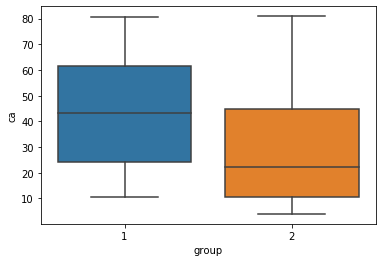

In [84]:
sns.boxplot('group','ca', data=df)

In [79]:
d2.dropna()['g1']

0     10.4
1     15.8
2     15.0
3     20.0
4     22.0
5     25.0
6     40.9
7     45.5
8     50.2
9     55.1
10    57.0
11    60.0
12    65.5
13    70.0
14    75.0
15    80.8
16    80.0
17    30.0
18    32.0
19    38.0
Name: g1, dtype: float64

In [88]:
d2

,g1,g2
0,10.4,4.0
1,15.8,6.0
2,15.0,6.0
3,20.0,8.0
4,22.0,10.6
5,25.0,10.0
6,40.9,11.0
7,45.5,14.0
8,50.2,16.0
9,55.1,19.0


In [89]:
mannwhitneyu(
    d2.dropna()['g1'], 
    d2['g2']
)

MannwhitneyuResult(statistic=127.0, pvalue=0.015704155229190574)